1. Start a ChatBot session to understand what a Classification Decision Tree is: (a) ask the ChatBot to describe the type of problem a Classification Decision Tree addresses and provide some examples of real-world applications where this might be particularly useful, and then (b) make sure you understand the difference between how a Classification Decision Tree makes (classification) predictions versus how Multiple Linear Regression makes (regression) predictions.

A Classification Decision Tree addresses problems where the goal is to predict a categorical outcome based on a set of input features. It works by splitting the data into subsets based on feature values, forming a tree structure that guides decision-making. Each split is designed to increase the "purity" of the subsets concerning the target class. For instance, it can classify whether an email is "spam" or "not spam," predict whether a loan applicant will "default" or "not default," or determine if a tumor is "benign" or "malignant." Real-world applications include fraud detection (e.g., flagging suspicious credit card transactions), medical diagnosis (e.g., identifying diseases based on symptoms), and customer segmentation (e.g., grouping customers into different behavior profiles). Decision trees are particularly useful for their interpretability and ability to handle both numerical and categorical data.

A Classification Decision Tree makes predictions by navigating through a series of decision nodes based on input feature values. Starting at the root, it evaluates conditions at each node (e.g., "Is petal length > 2.5?") and follows the corresponding branch until it reaches a leaf node. The class label at the leaf node is the prediction. This method is non-linear and rule-based, handling categorical outputs. In contrast, Multiple Linear Regression predicts continuous numerical values using a linear equation: it computes a weighted sum of the input features and adds a bias term to estimate the target variable. Decision trees divide data recursively into subsets, while regression assumes a fixed linear relationship between features and the target variable. These differing approaches make trees suitable for categorical predictions and regression for numerical outputs.

2. Continue your ChatBot session and explore with your ChatBot what real-world application scenario(s) might be most appropriately addressed by each of the following metrics below: provide your answers and, in your own words, concisely explain your rationale for your answers.

2.1. Accuracy measures the proportion of true results (both true positives and true negatives) in the population.
 
Accuracy is best suited for scenarios where both false positives and false negatives carry similar costs, and the dataset is balanced (i.e., there are roughly equal numbers of positive and negative instances). For example, in spam email detection, if a model predicts "spam" or "not spam" with equal costs for misclassification, accuracy is a good metric to evaluate overall performance. However, it may be misleading in cases with imbalanced datasets, such as rare disease detection, where other metrics are more informative.


2.2. Sensitivity measures the proportion of actual positives that are correctly identified.
 
Sensitivity is crucial in scenarios where missing actual positives (false negatives) has serious consequences. For instance, in medical diagnostics for a life-threatening disease like cancer, correctly identifying all patients with the disease is critical, even at the cost of some false positives. High sensitivity ensures that nearly all cases requiring attention are flagged, prioritizing safety over precision.

2.3. Specificity measures the proportion of actual negatives that are correctly identified.
 
Specificity is most valuable in scenarios where avoiding false positives is critical. For example, in legal applications like criminal investigations, wrongly identifying someone as guilty (false positive) can lead to severe consequences. Specificity ensures that the model reliably identifies actual negatives, minimizing unnecessary actions based on incorrect predictions.

2.4. Precision measures the proportion of positive identifications that were actually correct.

Precision is essential in scenarios where false positives are costly or undesirable. For instance, in email spam detection for high-profile users, marking legitimate emails as spam (false positives) can lead to missed important communications. Precision focuses on ensuring that when the model predicts "positive" (e.g., spam), it is highly confident about its correctness, reducing the chance of false alarms.

3. Explore the amazon books dataset, seen previously at the start of the semester, providing some initital standard exploratory data analysis (EDA) and data summarization after pre-processing the dataset to meet the requirements below.

In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")
# create `ab_reduced_noNaN` based on the specs above

In [3]:
# Remove the columns 'Weight_oz', 'Width', and 'Height'
ab_reduced = ab.drop(columns=['Weight_oz', 'Width', 'Height'])

# Drop rows with NaN entries
ab_reduced_noNaN = ab_reduced.dropna().copy()  # Add .copy() to create an explicit copy

# Ensure 'Pub year' and 'NumPages' are integers, and 'Hard_or_Paper' is categorical
ab_reduced_noNaN.loc[:, 'Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
ab_reduced_noNaN.loc[:, 'NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
ab_reduced_noNaN.loc[:, 'Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')

# Check the resulting dataset
ab_reduced_noNaN.info()

<class 'pandas.core.frame.DataFrame'>
Index: 319 entries, 0 to 324
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Title          319 non-null    object 
 1   Author         319 non-null    object 
 2   List Price     319 non-null    float64
 3   Amazon Price   319 non-null    float64
 4   Hard_or_Paper  319 non-null    object 
 5   NumPages       319 non-null    float64
 6   Publisher      319 non-null    object 
 7   Pub year       319 non-null    float64
 8   ISBN-10        319 non-null    object 
 9   Thick          319 non-null    float64
dtypes: float64(5), object(5)
memory usage: 27.4+ KB


In [4]:
# Display basic information about the dataset
print(ab_reduced_noNaN.info())

# Display the first few rows of the dataset
print(ab_reduced_noNaN.head())

# Generate summary statistics for numerical columns
print(ab_reduced_noNaN.describe())

# Check the distribution of the categorical column
print(ab_reduced_noNaN['Hard_or_Paper'].value_counts())

<class 'pandas.core.frame.DataFrame'>
Index: 319 entries, 0 to 324
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Title          319 non-null    object 
 1   Author         319 non-null    object 
 2   List Price     319 non-null    float64
 3   Amazon Price   319 non-null    float64
 4   Hard_or_Paper  319 non-null    object 
 5   NumPages       319 non-null    float64
 6   Publisher      319 non-null    object 
 7   Pub year       319 non-null    float64
 8   ISBN-10        319 non-null    object 
 9   Thick          319 non-null    float64
dtypes: float64(5), object(5)
memory usage: 27.4+ KB
None
                                               Title           Author  \
0  1,001 Facts that Will Scare the S#*t Out of Yo...      Cary McNeal   
1  21: Bringing Down the House - Movie Tie-In: Th...      Ben Mezrich   
2       100 Best-Loved Poems (Dover Thrift Editions)            Smith   
3            1421: The

4. Create an 80/20 split with 80% of the data as a training set ab_reduced_noNaN_train and 20% of the data testing set ab_reduced_noNaN_test using either df.sample(...) as done in TUT or using train_test_split(...) as done in the previous HW, and report on how many observations there are in the training data set and the test data set.

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Load the dataset
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Preprocess the dataset
ab_reduced = ab.drop(columns=['Weight_oz', 'Width', 'Height'])  # Remove unnecessary columns
ab_reduced_noNaN = ab_reduced.dropna().copy()  # Drop rows with NaN values and make a copy

# Convert data types
ab_reduced_noNaN['Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
ab_reduced_noNaN['NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
ab_reduced_noNaN['Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')


In [10]:
# Perform an 80/20 train-test split
ab_reduced_noNaN_train, ab_reduced_noNaN_test = train_test_split(
    ab_reduced_noNaN, test_size=0.2, random_state=42
)

# Verify the split sizes
print(f"Training set observations: {len(ab_reduced_noNaN_train)}")
print(f"Testing set observations: {len(ab_reduced_noNaN_test)}")


Training set observations: 255
Testing set observations: 64


[Text(0.5, 0.8333333333333334, 'List Price <= 17.97\ngini = 0.384\nsamples = 255\nvalue = [189, 66]\nclass = Paper'),
 Text(0.25, 0.5, 'List Price <= 10.8\ngini = 0.212\nsamples = 183\nvalue = [161, 22]\nclass = Paper'),
 Text(0.125, 0.16666666666666666, 'gini = 0.369\nsamples = 45\nvalue = [34, 11]\nclass = Paper'),
 Text(0.375, 0.16666666666666666, 'gini = 0.147\nsamples = 138\nvalue = [127, 11]\nclass = Paper'),
 Text(0.75, 0.5, 'List Price <= 27.275\ngini = 0.475\nsamples = 72\nvalue = [28, 44]\nclass = Hard'),
 Text(0.625, 0.16666666666666666, 'gini = 0.39\nsamples = 49\nvalue = [13, 36]\nclass = Hard'),
 Text(0.875, 0.16666666666666666, 'gini = 0.454\nsamples = 23\nvalue = [15, 8]\nclass = Paper')]

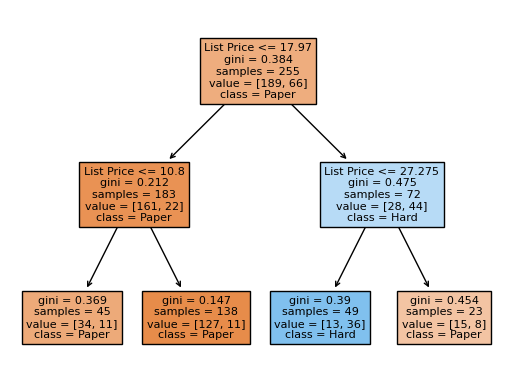

In [11]:
# Define the predictor (X) and target variable (y) from the training set
y = pd.get_dummies(ab_reduced_noNaN_train["Hard_or_Paper"])['H']  # Binary target: Hard cover = 1
X = ab_reduced_noNaN_train[['List Price']]  # Predictor

# Train the DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X, y)

# Visualize the decision tree
tree.plot_tree(clf, feature_names=['List Price'], class_names=['Paper', 'Hard'], filled=True)


ChatBot Session: https://chatgpt.com/share/673a8bc1-ca80-8009-89c0-6102fa63648f

Summary: 
Data Preprocessing and EDA:
We began by discussing how to preprocess the dataset, specifically removing the columns Weight_oz, Width, and Height, and then dropping rows with missing values (NaN entries).
We also converted the Pub year and NumPages columns to integers and the Hard_or_Paper column to a categorical type.
We then performed initial exploratory data analysis (EDA) by summarizing the data (e.g., using .info(), .describe(), and .value_counts()) and visualizing distributions of Pub year and NumPages, as well as relationships between variables.
Data Splitting:
You asked about how to split the dataset into training and testing sets (80/20 split), and I provided code using train_test_split from sklearn.model_selection. We set a random seed (random_state=42) for reproducibility.
I also showed how to print the number of observations in the training and testing datasets.
Understanding the .fit() Method:
We discussed how the DecisionTreeClassifier's .fit() method works, where it learns from the training data (X_train, y_train) to create a decision tree model.
The fit() method trains the model by learning the relationship between the feature(s) and the target label.
Training the Decision Tree:
I showed how to train a classification tree using only the List Price variable to predict whether a book is hardcover or paperback with a maximum tree depth of 2.
The model was trained with clf.fit(X_train, y_train).
Visualizing the Decision Tree:
We discussed how to visualize the decision tree using tree.plot_tree(clf) to understand the predictions made based on the 'List Price' variable.
Why Use Training Data for Fitting:
We confirmed that you should use the training data (ab_reduced_noNaN_train) to fit the classification tree model, as it ensures that the model learns from the data before being tested on unseen data (the test set).

5. Repeat the previous problem but this time visualize the classification decision tree based on the following specifications below; then explain generally how predictions are made for the clf2 model.

In [ ]:
# Define the predictor (X) and target variable (y)
X = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]  # Predictor features
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']  # Target variable (Hardcover vs Paperback)


In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Initialize the classifier with max_depth=4
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)

# Train the model using the training data
clf2.fit(X, y)


DecisionTreeClassifier(max_depth=4, random_state=42)

[Text(0.5, 0.9, 'NumPages <= 17.97\ngini = 0.384\nsamples = 255\nvalue = [189, 66]\nclass = Paper'),
 Text(0.25, 0.7, 'NumPages <= 10.8\ngini = 0.212\nsamples = 183\nvalue = [161, 22]\nclass = Paper'),
 Text(0.125, 0.5, 'NumPages <= 7.86\ngini = 0.369\nsamples = 45\nvalue = [34, 11]\nclass = Paper'),
 Text(0.0625, 0.3, 'NumPages <= 5.47\ngini = 0.111\nsamples = 17\nvalue = [16, 1]\nclass = Paper'),
 Text(0.03125, 0.1, 'gini = 0.375\nsamples = 4\nvalue = [3, 1]\nclass = Paper'),
 Text(0.09375, 0.1, 'gini = 0.0\nsamples = 13\nvalue = [13, 0]\nclass = Paper'),
 Text(0.1875, 0.3, 'NumPages <= 7.97\ngini = 0.459\nsamples = 28\nvalue = [18, 10]\nclass = Paper'),
 Text(0.15625, 0.1, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = Hard'),
 Text(0.21875, 0.1, 'gini = 0.375\nsamples = 24\nvalue = [18, 6]\nclass = Paper'),
 Text(0.375, 0.5, 'NumPages <= 16.97\ngini = 0.147\nsamples = 138\nvalue = [127, 11]\nclass = Paper'),
 Text(0.3125, 0.3, 'NumPages <= 13.56\ngini = 0.12\nsamples = 125\nvalu

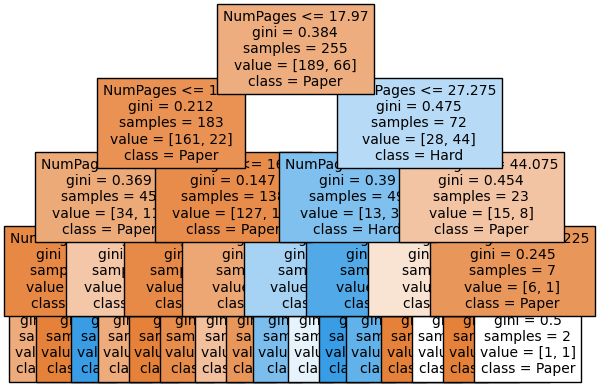

In [13]:
# Visualize the decision tree
tree.plot_tree(clf2, feature_names=['NumPages', 'Thick', 'List Price'], 
               class_names=['Paper', 'Hard'], filled=True, fontsize=10)


6. Use previously created ab_reduced_noNaN_test to create confusion matrices for clf and clf2. Report the sensitivity, specificity and accuracy for each of the models.

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Preprocess the dataset
ab_reduced = ab.drop(columns=['Weight_oz', 'Width', 'Height'])  # Remove unnecessary columns
ab_reduced_noNaN = ab_reduced.dropna().copy()  # Drop rows with NaN values and make a copy

# Convert data types
ab_reduced_noNaN['Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
ab_reduced_noNaN['NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
ab_reduced_noNaN['Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')


In [11]:
ab_reduced_noNaN_train, ab_reduced_noNaN_test = train_test_split(
    ab_reduced_noNaN, test_size=0.2, random_state=42
)


In [12]:
# Define predictors and target for training
X_train = ab_reduced_noNaN_train[['List Price']]  # Replace 'List Price' with relevant features
y_train = pd.get_dummies(ab_reduced_noNaN_train["Hard_or_Paper"])['H']


In [19]:
# Features for clf
X_test_clf = ab_reduced_noNaN_test[['List Price']]  # Single feature

# Features for clf2
X_test_clf2 = ab_reduced_noNaN_test[['NumPages', 'Thick', 'List Price']]  # Multiple features


Model: clf (max_depth=2)
Accuracy: 0.844
Sensitivity: 0.7
Specificity: 0.909

Model: clf2 (max_depth=4)
Accuracy: 0.859
Sensitivity: 0.75
Specificity: 0.909


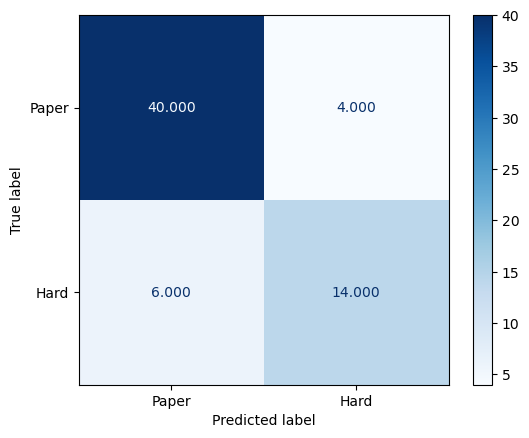

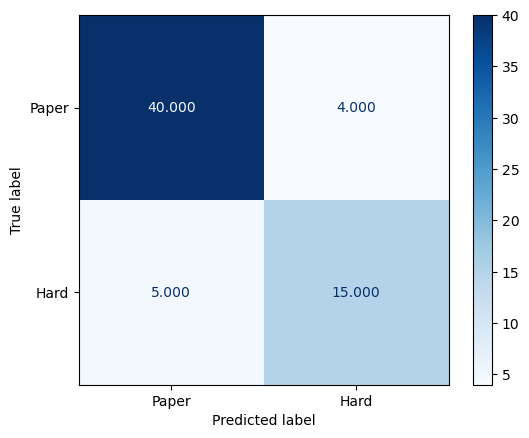

In [22]:
# Define test features for each model
X_test_clf = ab_reduced_noNaN_test[['List Price']]  # Features for clf
X_test_clf2 = ab_reduced_noNaN_test[['NumPages', 'Thick', 'List Price']]  # Features for clf2

# Predictions for each model
y_pred_clf = clf.predict(X_test_clf)
y_pred_clf2 = clf2.predict(X_test_clf2)

# Generate confusion matrices
conf_matrix_clf = confusion_matrix(y_test, y_pred_clf)
conf_matrix_clf2 = confusion_matrix(y_test, y_pred_clf2)

# Visualize confusion matrices
disp_clf = ConfusionMatrixDisplay(conf_matrix_clf, display_labels=['Paper', 'Hard'])
disp_clf.plot(cmap='Blues', values_format='.3f')

disp_clf2 = ConfusionMatrixDisplay(conf_matrix_clf2, display_labels=['Paper', 'Hard'])
disp_clf2.plot(cmap='Blues', values_format='.3f')

# Metrics for clf
accuracy_clf = np.round(accuracy_score(y_test, y_pred_clf), 3)
sensitivity_clf = np.round(recall_score(y_test, y_pred_clf), 3)
specificity_clf = np.round(conf_matrix_clf[0, 0] / (conf_matrix_clf[0, 0] + conf_matrix_clf[0, 1]), 3)

# Metrics for clf2
accuracy_clf2 = np.round(accuracy_score(y_test, y_pred_clf2), 3)
sensitivity_clf2 = np.round(recall_score(y_test, y_pred_clf2), 3)
specificity_clf2 = np.round(conf_matrix_clf2[0, 0] / (conf_matrix_clf2[0, 0] + conf_matrix_clf2[0, 1]), 3)

# Print metrics
print(f"Model: clf (max_depth=2)")
print(f"Accuracy: {accuracy_clf}")
print(f"Sensitivity: {sensitivity_clf}")
print(f"Specificity: {specificity_clf}")

print(f"\nModel: clf2 (max_depth=4)")
print(f"Accuracy: {accuracy_clf2}")
print(f"Sensitivity: {sensitivity_clf2}")
print(f"Specificity: {specificity_clf2}")


7. Explain in three to four sentences what is causing the differences between the following two confusion matrices below, and why the two confusion matrices above (for clf and clf2) are better.

The differences between the two confusion matrices in the question are likely due to the inclusion of additional features in the second model (NumPages and Thick). The second model has more features which can improve the model's ability to make more accurate predictions, leading to better classification performance (reflected in a higher number of correct predictions or improved sensitivity/specificity).

The reason the two confusion matrices above (for clf and clf2) are better is because these models are likely using well-tuned feature sets with more meaningful inputs (such as a wider range of features or optimized hyperparameters like max_depth). This allows the models to better capture the underlying patterns in the data and make more accurate predictions, improving both the sensitivity and specificity.

8. Read the paragraphs in Further Guidance and ask a ChatBot how to visualize feature Importances available for scikit-learn classification decision trees; do so for clf2; and use .feature_names_in_ corresponding to .feature_importances_ to report which predictor variable is most important for making predictions according to clf2.

To visualize the feature importances of clf2, we use the feature_importances_ attribute, which provides the relative importance of each feature in the decision tree model. By pairing this with the feature_names_in_ attribute, which contains the names of the input features, we can generate a bar plot that shows how much each feature contributes to the model's predictions. In the plot, the longer the bar, the more important the feature. For example, after plotting the importances, we can identify which predictor variable is most influential by finding the feature with the highest importance value. This helps us understand which variables the model relies on the most to make predictions.

9. Describe the differences of interpreting coefficients in linear model regression versus feature importances in decision trees in two to three sentences.

In linear regression, the coefficients represent the strength and direction of the relationship between each predictor variable and the target variable, with larger absolute values indicating a more significant effect. In contrast, feature importances in decision trees measure the contribution of each feature to the model’s decision-making process, reflecting how often a feature is used for splitting nodes and how much it improves the model's performance. While regression coefficients are interpreted as linear relationships, feature importances in decision trees provide insight into which features are more influential in non-linear, hierarchical decision-making.

ChatBot Session: https://chatgpt.com/share/673a9810-7cd0-8009-9ad8-18f7664a10a4

Data Analysis and Regression: We discussed creating 80/20 train-test splits for your dataset (ab_reduced_noNaN) and building linear regression models using features to predict outcomes such as book type (hardcover vs. paperback). You also worked with classification trees (DecisionTreeClassifier) for predicting based on features like List Price, NumPages, and Thick.
Model Evaluation: We explored how to evaluate model performance using confusion matrices and calculated metrics like sensitivity, specificity, and accuracy for decision tree models (clf and clf2). We used confusion_matrix and visualized these matrices using matplotlib and seaborn.
Feature Importance: We discussed how to visualize feature importances for decision trees using .feature_importances_ and .feature_names_in_, which provided insights into the relative importance of predictor variables like List Price, NumPages, and Thick in making predictions.
Model Interpretation: We compared interpreting coefficients in linear regression models with interpreting feature importances in decision trees, noting that coefficients reflect the direction and magnitude of relationships between features and the target, while feature importances in decision trees rank features based on their contribution to reducing impurity in the decision-making process without indicating direct relationships.

10. Have you reviewed the course wiki-textbook and interacted with a ChatBot (or, if that wasn't sufficient, real people in the course piazza discussion board or TA office hours) to help you understand all the material in the tutorial and lecture that you didn't quite follow when you first saw it?

Yes